In [1]:
%pylab inline

import numpy as np
from astropy.table import Table
from astropy.io import ascii
from matplotlib import pyplot as plt
from matplotlib.patches import Ellipse
from scipy.stats import norm
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn import preprocessing

from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = Table.read('breddkatalog_fluxes.csv', converters = {'col1': [ascii.convert_numpy(np.str)]})

In [3]:
print data

    Name       T90      Flnc     Flnc_err  ... alpha_nerr    beta    W  
------------ ------- ---------- ---------- ... ---------- --------- ----
GRB080714745  59.649  6.333e-06 1.4144e-07 ...  0.1744832 -6.913354 0.99
GRB080723557  58.369  7.223e-05 2.5419e-07 ... 0.08686186 -2.410852 1.24
GRB080723985  42.816 3.0792e-05 2.0698e-07 ... 0.08320153 -2.641696 1.15
GRB080724401 379.397 1.5691e-05 5.0397e-08 ...  0.1188199 -2.411934 1.31
GRB080725435   25.92 7.9853e-06 4.4172e-08 ...   0.187779 -2.534569 1.26
GRB080725541    0.96 4.9216e-07 4.3882e-08 ...   0.353165 -5.732057 1.01
GRB080727964  89.089 1.3298e-05 7.9086e-08 ...  0.1893466 -18.26271 0.98
GRB080730520  17.408 4.8707e-06 9.8931e-08 ...  0.3855068 -2.254599 1.63
GRB080730786  13.312  6.346e-06 8.3102e-08 ...  0.1057001 -2.569786 1.05
GRB080802386   0.576 3.9772e-07  6.852e-09 ...  0.3591147 -12.30418 0.83
         ...     ...        ...        ... ...        ...       ...  ...
GRB150923864   1.792 1.5772e-06 1.4473e-08 ...  0.4

In [4]:
name = data['Name']
width = data['W']
alpha = data['alpha'] 
epk = data['Epk'] 
t90 = data['T90']
flnc = data['Flnc']
flux = data['Pflux1024']
beta = data['beta']

In [5]:
X = np.vstack([alpha,beta]).T


In [6]:
np.shape(X)


(1144, 2)

In [7]:
n_clusters = 5

scaler = preprocessing.StandardScaler()
clf = KMeans(n_clusters)
clf.fit(scaler.fit_transform(X))

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=5, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

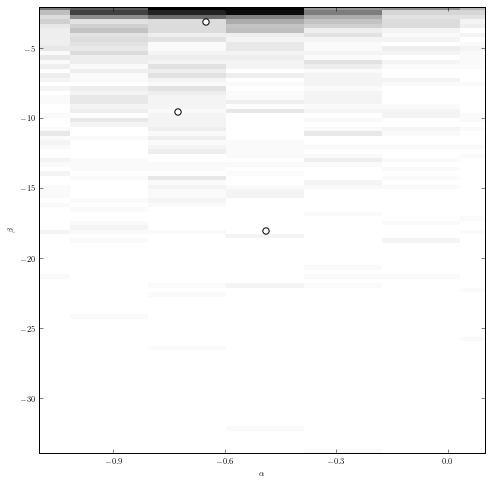

In [8]:
H, alpha_bins, beta_bins = np.histogram2d(alpha, beta, 100)
# Visualize the results
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot()

# plot density
ax = plt.axes()
ax.imshow(H.T, origin='lower', interpolation='nearest', aspect='auto',
          extent=[alpha_bins[0], alpha_bins[-1],
                  beta_bins[0], beta_bins[-1]],
          cmap=plt.cm.binary)

# plot cluster centers
cluster_centers = scaler.inverse_transform(clf.cluster_centers_)
ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1],
           s=40, c='w', edgecolors='k')

# plot cluster boundaries

alpha_centers = 0.5 * (alpha_bins[1:] + alpha_bins[:-1])
beta_centers = 0.5 * (beta_bins[1:] + beta_bins[:-1])

Xgrid = np.meshgrid(alpha_centers, beta_centers)
Xgrid = np.array(Xgrid).reshape((2, 100 * 100)).T

H = clf.predict(scaler.transform(Xgrid)).reshape((100, 100))

for i in range(n_clusters):
    Hcp = H.copy()
    flag = (Hcp == i)
    Hcp[flag] = 1
    Hcp[~flag] = 0

ax.contour(alpha_centers, beta_centers, Hcp, [-0.5, 0.5],
               linewidths=1, colors='k')
ax.xaxis.set_major_locator(plt.MultipleLocator(0.3))
ax.set_xlim(-1.101, 0.101)
ax.set_ylim(beta_bins[0], beta_bins[-1])

ax.set_xlabel(r'$\rm \alpha$')
ax.set_ylabel(r'$\rm \beta$')

plt.show()
